<a href="https://colab.research.google.com/github/mateo16dev/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd #Para el analisis de los datos
import matplotlib.pyplot as plt #para crear gráficos
import os #para crear carpetas dentro del repositorio


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



### Ingreso total por cada tienda

In [2]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [3]:
# Mostrar los resultados filtrados.
ingreso_t1 = tienda['Precio'].sum()
ingreso_t2 = tienda2['Precio'].sum()
ingreso_t3 = tienda3['Precio'].sum()
ingreso_t4 = tienda4['Precio'].sum()

In [4]:
print(f'Los ingresos de la tienda No.1 son: {ingreso_t1} \nLos ingresos de la tienda No.2 son {ingreso_t2}\nLos ingresos de la tienda No.3 son: {ingreso_t3} \nLos ingresos de la tienda No.4 son: {ingreso_t4}')

Los ingresos de la tienda No.1 son: 1150880400.0 
Los ingresos de la tienda No.2 son 1116343500.0
Los ingresos de la tienda No.3 son: 1098019600.0 
Los ingresos de la tienda No.4 son: 1038375700.0


In [5]:
ingresos = []

for tienda in tiendas:
  ingresos.append(tienda['Precio'].sum())

print(f'ingresos = {ingresos}')

ingresos = [np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


In [6]:
print(f'Los ingresos de la tienda No.1 son: {ingresos[0]} \nLos ingresos de la tienda No.2 son {ingresos[1]}\nLos ingresos de la tienda No.3 son: {ingresos[2]} \nLos ingresos de la tienda No.4 son: {ingresos[3]}')

Los ingresos de la tienda No.1 son: 1150880400.0 
Los ingresos de la tienda No.2 son 1116343500.0
Los ingresos de la tienda No.3 son: 1098019600.0 
Los ingresos de la tienda No.4 son: 1038375700.0


In [7]:
# Mostrar los resultados filtrados. CON PANDAS
facturacion_t1 = tienda['Precio'].astype(float).sum()
facturacion_t2 = tienda2['Precio'].astype(float).sum()
facturacion_t3 = tienda3['Precio'].astype(float).sum()
facturacion_t4 = tienda4['Precio'].astype(float).sum()

# 2. Ventas por categoría

In [8]:
#Saber cuantas catergorias existen
categorias = tienda['Categoría del Producto'].unique()
print(categorias)

['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes'
 'Artículos para el hogar']


In [9]:
# Categorias = ['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos''Artículos para el hogar' 'Deportes y diversión' 'Libros''Instrumentos musicales']
categorias_por_tienda = []

def contar_categorias_por_tienda(tiendas, nombres):
  resultados = []
  for nombre, tienda in zip(nombres,tiendas):
    conteo_categoria = tienda['Categoría del Producto'].value_counts()
    resultados.append([nombre, conteo_categoria.to_dict()])

  return resultados

In [10]:
categorias_por_tienda = contar_categorias_por_tienda(tiendas, nombres)
categorias_por_tienda

[['Tienda 1',
  {'Muebles': 465,
   'Electrónicos': 448,
   'Juguetes': 324,
   'Electrodomésticos': 312,
   'Deportes y diversión': 284,
   'Instrumentos musicales': 182,
   'Libros': 173,
   'Artículos para el hogar': 171}],
 ['Tienda 2',
  {'Muebles': 442,
   'Electrónicos': 422,
   'Juguetes': 313,
   'Electrodomésticos': 305,
   'Deportes y diversión': 275,
   'Instrumentos musicales': 224,
   'Libros': 197,
   'Artículos para el hogar': 181}],
 ['Tienda 3',
  {'Muebles': 499,
   'Electrónicos': 451,
   'Juguetes': 315,
   'Electrodomésticos': 278,
   'Deportes y diversión': 277,
   'Libros': 185,
   'Instrumentos musicales': 177,
   'Artículos para el hogar': 177}],
 ['Tienda 4',
  {'Muebles': 480,
   'Electrónicos': 451,
   'Juguetes': 338,
   'Deportes y diversión': 277,
   'Electrodomésticos': 254,
   'Artículos para el hogar': 201,
   'Libros': 187,
   'Instrumentos musicales': 170}]]

# 3. Calificación promedio de la tienda


In [11]:
calificacion_por_tienda = [round(sum(tienda['Calificación'])/len(tienda['Calificación']),2) for tienda in tiendas]
calificacion_por_tienda

[3.98, 4.04, 4.05, 4.0]

In [12]:
calificacion_por_tienda = []

def promedio_calificacion_por_tienda(tiendas, nombres):
  resultados = []
  for nombre, tienda in zip(nombres,tiendas):
    promedio_calificacion = round(tienda['Calificación'].mean(),2)
    resultados.append([nombre, promedio_calificacion])
  return resultados

In [13]:
calificacion_por_tienda = promedio_calificacion_por_tienda(tiendas, nombres)
calificacion_por_tienda


[['Tienda 1', np.float64(3.98)],
 ['Tienda 2', np.float64(4.04)],
 ['Tienda 3', np.float64(4.05)],
 ['Tienda 4', np.float64(4.0)]]

# 4. Productos más y menos vendidos

In [14]:
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
productos_vendidos = todas_las_tiendas['Producto'].value_counts()

producto_mas_vendido = productos_vendidos.index[0]
producto_menos_vendido = productos_vendidos.index[-1]

print(f"El producto más vendido es: {producto_mas_vendido}")
print(f"El producto menos vendido es: {producto_menos_vendido}")

El producto más vendido es: Cama box
El producto menos vendido es: Guitarra eléctrica


# 5. Envío promedio por tienda

In [15]:
promedio_envio_por_tienda = []

for nombre, tienda in zip(nombres, tiendas):
  promedio_envio = round(tienda['Costo de envío'].mean(), 2)
  promedio_envio_por_tienda.append([nombre, promedio_envio])

print("Envío promedio por tienda:")
for tienda, promedio in promedio_envio_por_tienda:
  print(f"{tienda}: {promedio}")

Envío promedio por tienda:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


#6.Generando gráficos



##*Ingreso total por cada tienda*



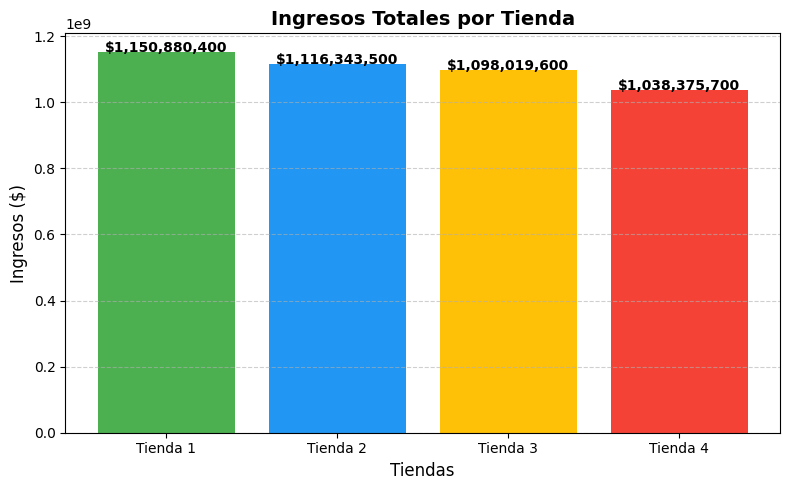

NameError: name 'ruta_img' is not defined

In [17]:
# Datos
ingresos = [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear carpeta img si no existe
os.makedirs('img', exist_ok=True)

# Configuración del gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, ingresos, color=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Ingresos Totales por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos ($)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas encima de cada barra
for barra in barras:
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 50,
             f"${barra.get_height():,.0f}", ha='center', fontsize=10, fontweight='bold')

# Mostrar en el notebook
plt.tight_layout()
plt.show()

# Guardar como PNG
ruta_archivo = os.path.join(ruta_img, 'ventas_por_tienda.png')
plt.savefig(ruta_archivo, dpi=300)
print(f"✅ Gráfico guardado en: {ruta_archivo}")